<a href="https://colab.research.google.com/github/tamaravera14/SIMULACI-N-I/blob/main/Transformada_inversa_TABV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MÉTODO DE LA TRANSFORMADA INVERSA
## DISTRIBUCIÓN TRIANGULAR
### Tamara Alheli Bazaldua Vera

---
Es una distribución continua definida por tres parámetros:

*  a: valor mínimo (inicio)

*  b: moda (el valor más probable)

*  c: valor máximo (fin)

La forma de la distribución es triangular, con el pico en b.

---

---
Pasos:
1. Dado un $f(x)$ calculamos:
$$F(x) = ∫_{-∞}^{x} {f(\delta) d_{\delta}}$$
2. Suponer $R$ ~ $U(0,1)$ y resolver: $F(x) = R $ para obtener:
$$ x = F^{-1}{(R)} $$
---

---
Con:
$$\mu_x = \frac{a+b+c}{3}$$
$$\sigma_{x}^2 = \frac{a^2+b^2+c^2-ab-ac-bc}{18}$$

---

Sea la funcion:
$$ f(x) =
\begin{cases}
\frac{2(x-a)}{(c-a)(b-a)} & \text{si } a \leq x \leq b \\
\frac{2(c-x)}{(c-a)(b-c)} & \text{si } b < x \leq c
\end{cases} $$
Calculando la $F(x)$, tenemos:
$$ F(x) = \begin{cases}
\frac{(x-a)^2}{(c-a)(b-a)} & \text{si } a \leq x \leq b \\
1 - \frac{(c-x)^2}{(c-a)(b-c)} & \text{si } b < x \leq c
\end{cases} $$
Calculando la inversa, tenemos:
$$x = F^{-1}(x) = \begin{cases}
\sqrt{R(c-a)(b-a)} +a & \text{si } a \leq R \leq \frac{b-a}{c-a} \\
c - \sqrt{(1-R)(c-a)(c-b)} & \text{si } \frac{b-a}{c-a} < R \leq c
\end{cases} $$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import statistics

In [33]:
a=1
b=3
c=5
mu = (a+b+c)/3
sigma = math.sqrt((a**2+b**2+c**2-a*b-a*c-b*c)/18)
n = 10000

**Aquí lo que se hizo fue primero asignar el valor a x y comparar los intervalos para ver en donde se encontraba para ver en donde asignar el valor de x.**


In [34]:
def triangularFx(n):
  lista = []
  for _ in range(n):
    R = random.random()
    x = math.sqrt(R*(c-a)*(b-a)) + a
    if a <= x <= b:
      lista.append(x)
    else:
      x = c - math.sqrt((1-R)*(c-a)*(c-b))
      lista.append(x)

  return lista

In [35]:
tabla = triangularFx(n)

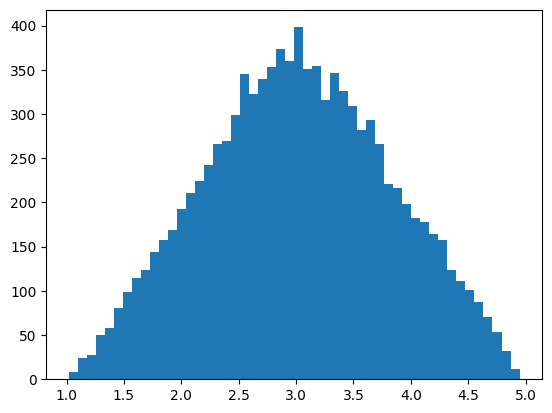

In [36]:
plt.hist(tabla, bins=50)
plt.show()

In [48]:
print("Media estimada: ", np.mean(tabla))
print("Media exacta: ", mu)
print("Error de media con respecto a la real:", abs(mu-np.mean(tabla)))

Media estimada:  3.0199386961415926
Media exacta:  3.0
Error de media con respecto a la real: 0.019938696141592605


In [49]:
print("Varianza estimada: ", np.var(tabla))
print("Varianza exacta: ", sigma)
print("Error de varianza con respecto a la real:", abs(sigma-np.var(tabla)))

Varianza estimada:  0.6498597154094669
Varianza exacta:  0.816496580927726
Error de varianza con respecto a la real: 0.16663686551825918


In [51]:
print("Periodo de aceptacion: ", len(tabla), "de", n)

Periodo de aceptacion:  10000 de 10000


**Aqui se genera el R aleatorio y se hace la comparativa con los intervalos de R.**

In [38]:
def triangularFR(n):
  lista = []
  for _ in range(n):
    R = random.random()
    F = (b-a) / (c-a)
    if R <= F:
      lista.append(math.sqrt(R*(c-a)*(b-a)) + a)
    else:
      lista.append(c - math.sqrt((1-R)*(c-a)*(c-b)))

  return lista

In [39]:
Fr = triangularFR(n)

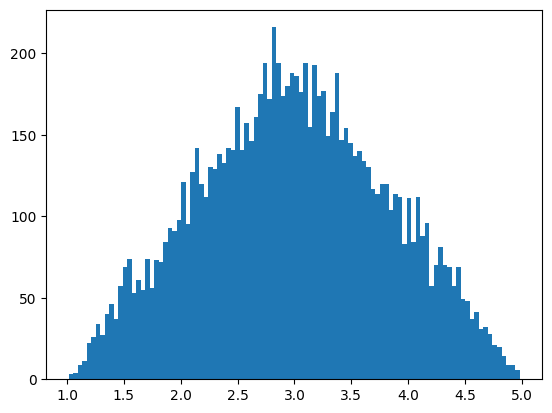

In [40]:
plt.hist(Fr, bins=100)
plt.show()

In [41]:
print("Media estimada: ", np.mean(Fr))
print("Media exacta: ", mu)
print("Error de media con respecto a la real:", abs(mu-np.mean(Fr)))

Media estimada:  2.990948904597812
Media exacta:  3.0
Error de media con respecto a la real: 0.009051095402187848


In [42]:
print("Varianza estimada: ", np.var(Fr))
print("Varianza exacta: ", sigma)
print("Error de varianza con respecto a la real:", abs(sigma-np.var(Fr)))

Varianza estimada:  0.674249542476295
Varianza exacta:  0.816496580927726
Error de varianza con respecto a la real: 0.14224703845143105


In [43]:
print("Periodo de aceptacion: ", len(Fr), "de", n)

Periodo de aceptacion:  10000 de 10000


### **Grafica de $ F(x) $ con valores normalizados**

In [44]:
F_norm = [ i / c for i in Fr]

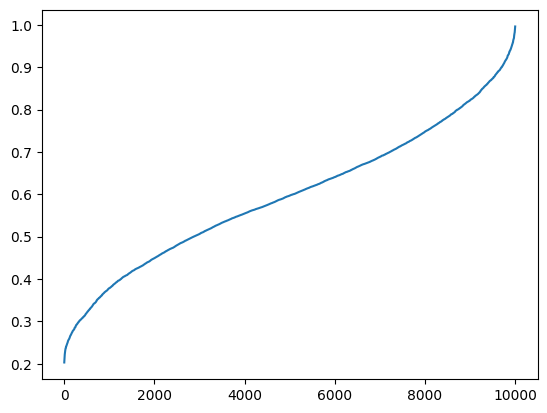

In [45]:
F_x = np.sort(F_norm)
plt.plot(F_x)
plt.show()